In [1]:
import pandas as pd
from nltk import word_tokenize
import yfinance as yf
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def yields_download(stocks, a, b):
    data = yf.download(stocks, start=a, end=b)
    data = data.pct_change()
    return data

In [3]:
def clusterize(a, raw_data, graph = False):
    # Clusterizamos
    
    data_tickers = pd.DataFrame(raw_data['Tweet'])
    raw_data = raw_data.drop(columns = ['Tweet'])
    
    try:
        raw_data = raw_data.drop(columns = ['Clusters'])
    except KeyError:
        pass
    
    wcss = []

    for i in range(1, a):
        kmeans = KMeans(n_clusters = i, max_iter = 300)
        kmeans.fit(raw_data)
        wcss.append(kmeans.inertia_)

    clustering = KMeans(n_clusters = a, max_iter = 300)
    clustering.fit(raw_data)

    raw_data['Clusters'] = clustering.labels_
    raw_data.insert(loc = 0, column = 'Tweet', value = data_tickers)
    
    if graph:
        # Codo de Jambú
        plt.plot(range(1,a), wcss)
        plt.xlabel('Número de Clusters')
        plt.ylabel('WCSS')
        plt.show()

    return raw_data

In [4]:
tweets = pd.read_csv("data_elonmusk.csv", encoding='latin1')
tweets = tweets.assign(Time=pd.to_datetime(tweets.Time)).drop('row ID', axis='columns')
tweets

,Tweet,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:00
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:00
2,@bigajm Yup :),2017-09-29 10:39:00
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:00
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:00
...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:00
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:00
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:00
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:00


In [5]:
tweets.set_index('Time')

,Tweet
Time,
2017-09-29 17:39:00,@MeltingIce Assuming max acceleration of 2 to ...
2017-09-29 10:44:00,RT @SpaceX: BFR is capable of transporting sat...
2017-09-29 10:39:00,@bigajm Yup :)
2017-09-29 09:56:00,Part 2 https://t.co/8Fvu57muhM
2017-09-29 09:19:00,Fly to most places on Earth in under 30 mins a...
...,...
2012-11-20 08:52:00,"@YOUSRC Amos's article was fair, but his edito..."
2012-11-20 08:38:00,These articles in Space News describe why Aria...
2012-11-20 08:30:00,Was misquoted by BBC as saying Europe's rocket...


In [6]:
tweets['Time'] = tweets["Time"].values.astype('datetime64[D]') + 1
tweets

,Tweet,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-30
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-30
2,@bigajm Yup :),2017-09-30
3,Part 2 https://t.co/8Fvu57muhM,2017-09-30
4,Fly to most places on Earth in under 30 mins a...,2017-09-30
...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-21
3214,These articles in Space News describe why Aria...,2012-11-21
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-21
3216,Just returned from a trip to London and Oxford...,2012-11-20


In [7]:
start = tweets['Time'].iloc[-1]
start.strftime('%d-%m-%Y')

'17-11-2012'

In [8]:
end = tweets['Time'].iloc[0]
end.strftime('%d-%m-%Y')

'30-09-2017'

In [9]:
yields = pd.DataFrame(yields_download('TSLA', start, end))
yields

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-19,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-20,0.022763,-0.004511,0.002198,0.002430,0.002430,-0.337475
2012-11-21,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119
2012-11-23,-0.000307,-0.019122,-0.018272,-0.010471,-0.010471,-0.553260
2012-11-26,-0.015337,-0.016144,-0.002524,0.004357,0.004357,0.152219
...,...,...,...,...,...,...
2017-09-25,-0.036399,-0.033604,-0.022800,-0.017374,-0.017374,-0.067836
2017-09-26,-0.006286,-0.017428,-0.005775,0.000754,0.000754,-0.059112
2017-09-27,-0.002935,0.000712,-0.001173,-0.012397,-0.012397,-0.153152


In [10]:
tweets = tweets.set_index('Time')
tweets

,Tweet
Time,
2017-09-30,@MeltingIce Assuming max acceleration of 2 to ...
2017-09-30,RT @SpaceX: BFR is capable of transporting sat...
2017-09-30,@bigajm Yup :)
2017-09-30,Part 2 https://t.co/8Fvu57muhM
2017-09-30,Fly to most places on Earth in under 30 mins a...
...,...
2012-11-21,"@YOUSRC Amos's article was fair, but his edito..."
2012-11-21,These articles in Space News describe why Aria...
2012-11-21,Was misquoted by BBC as saying Europe's rocket...


In [11]:
tweets_merged = tweets.merge(yields, how='outer', left_index=True, right_index=True)

In [12]:
tweets_merged = tweets_merged.dropna()
tweets_merged

,Tweet,Open,High,Low,Close,Adj Close,Volume
2012-11-20,Just returned from a trip to London and Oxford...,0.022763,-0.004511,0.002198,0.002430,0.002430,-0.337475
2012-11-21,"Btw, I don't think Apple is doomed. Just won't...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119
2012-11-21,Mass. judge denies auto dealers' demand to kil...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119
2012-11-21,"@YOUSRC Amos's article was fair, but his edito...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119
2012-11-21,These articles in Space News describe why Aria...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119
...,...,...,...,...,...,...,...
2017-09-28,Prev ideas for paying ~$10B dev cost incl. Kic...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222
2017-09-28,Headed to Adelaide soon to describe new BFR pl...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222
2017-09-29,@kevinroose Just another day in the office,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947
2017-09-29,@Fashionista_com @mayemusk Congrats Mom! I lov...,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947


### Clusterización Piloto (Probamos con 10 clusters y observamos el codo)

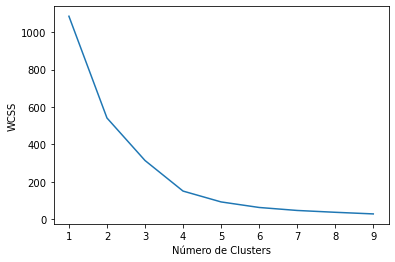

,Tweet,Open,High,Low,Close,Adj Close,Volume,Clusters
2012-11-20,Just returned from a trip to London and Oxford...,0.022763,-0.004511,0.002198,0.002430,0.002430,-0.337475,9
2012-11-21,"Btw, I don't think Apple is doomed. Just won't...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,Mass. judge denies auto dealers' demand to kil...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,"@YOUSRC Amos's article was fair, but his edito...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,These articles in Space News describe why Aria...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
...,...,...,...,...,...,...,...,...
2017-09-28,Prev ideas for paying ~$10B dev cost incl. Kic...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222,4
2017-09-28,Headed to Adelaide soon to describe new BFR pl...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222,4
2017-09-29,@kevinroose Just another day in the office,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947,4
2017-09-29,@Fashionista_com @mayemusk Congrats Mom! I lov...,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947,4


In [13]:
clusters = clusterize(10, tweets_merged,  graph = True)
clusters

###  Clusterización (5 clusters)

In [14]:
clusters = clusterize(5, tweets_merged,  graph = False)
clusters

,Tweet,Open,High,Low,Close,Adj Close,Volume,Clusters
2012-11-20,Just returned from a trip to London and Oxford...,0.022763,-0.004511,0.002198,0.002430,0.002430,-0.337475,1
2012-11-21,"Btw, I don't think Apple is doomed. Just won't...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,Mass. judge denies auto dealers' demand to kil...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,"@YOUSRC Amos's article was fair, but his edito...",-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
2012-11-21,These articles in Space News describe why Aria...,-0.005793,0.011178,0.011909,-0.016061,-0.016061,0.044119,4
...,...,...,...,...,...,...,...,...
2017-09-28,Prev ideas for paying ~$10B dev cost incl. Kic...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222,1
2017-09-28,Headed to Adelaide soon to describe new BFR pl...,-0.028637,-0.024865,-0.014978,-0.004018,-0.004018,-0.122222,1
2017-09-29,@kevinroose Just another day in the office,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947,1
2017-09-29,@Fashionista_com @mayemusk Congrats Mom! I lov...,0.005826,0.005631,0.009541,0.004417,0.004417,-0.039947,1


In [15]:
print("Estructura de los clusters:")
clusters['Clusters'].value_counts()

Estructura de los clusters:


1    1106
4     720
0     189
2      33
3       3
Name: Clusters, dtype: int64

In [16]:
cluster_0 = clusters[clusters['Clusters'] == 0]
cluster_1 = clusters[clusters['Clusters'] == 1]
cluster_2 = clusters[clusters['Clusters'] == 2]
cluster_3 = clusters[clusters['Clusters'] == 3]
cluster_4 = clusters[clusters['Clusters'] == 4]

In [17]:
writer = pd.ExcelWriter("clusters_musk_tesla.xlsx", engine='xlsxwriter')

cluster_0.to_excel(writer, sheet_name = "Cluster 0")
cluster_1.to_excel(writer, sheet_name = "Cluster 1")
cluster_2.to_excel(writer, sheet_name = "Cluster 2")
cluster_3.to_excel(writer, sheet_name = "Cluster 3")
cluster_4.to_excel(writer, sheet_name = "Cluster 4")

writer.save()